In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


## Data set input here

In [2]:
df = pd.read_csv("data/sentimentdataset.csv")


In [4]:
# Display the first few rows

#df.head()


In [ ]:
#df.info()


In [5]:

df.describe()

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


Data cleaning 

In [5]:

# Handle missing values (if any)

# #Check for missing values
missing_values = df.isnull().sum()
#print(missing_values)
df.fillna(value='', inplace=True)  # Replace missing values with empty strings



In [ ]:
# Value counts for categorical columns
#print(df['Sentiment'].value_counts())
#print(df['Platform'].value_counts())

Likes according to country based on facebook

In [17]:


# Strip any leading/trailing spaces from the Platform column
df['Platform'] = df['Platform'].str.strip()
df['Country'] = df['Country'].str.strip()


# Filter for Facebook platform
facebook_df = df[df['Platform'] == 'Facebook']

#Group by 'Country' and sum 'Likes'
total_likes_by_country = facebook_df.groupby('Country')['Likes'].sum().reset_index()


# Sort the results in ascending order
total_likes_by_country = total_likes_by_country.sort_values(by='Likes', ascending=False)


# Print the results
#print(total_likes_by_country)

Creating bar chart for that

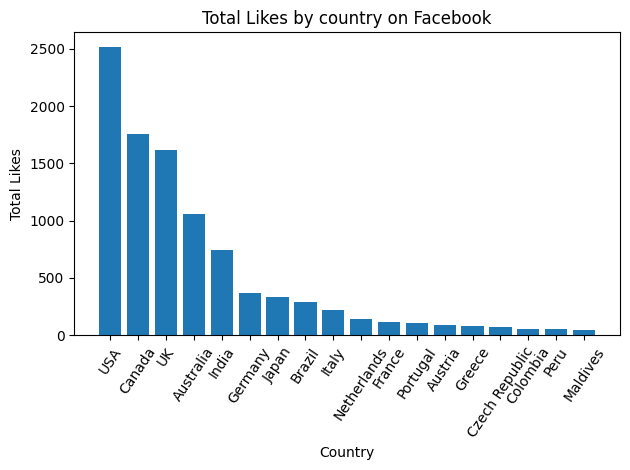

In [26]:
plt.bar(total_likes_by_country['Country'],total_likes_by_country['Likes'])
plt.xlabel('Country')
plt.ylabel('Total Likes')
plt.title('Total Likes by country on Facebook')
plt.xticks(rotation = 56)
plt.tight_layout()

#display
plt.show()


For Retweets

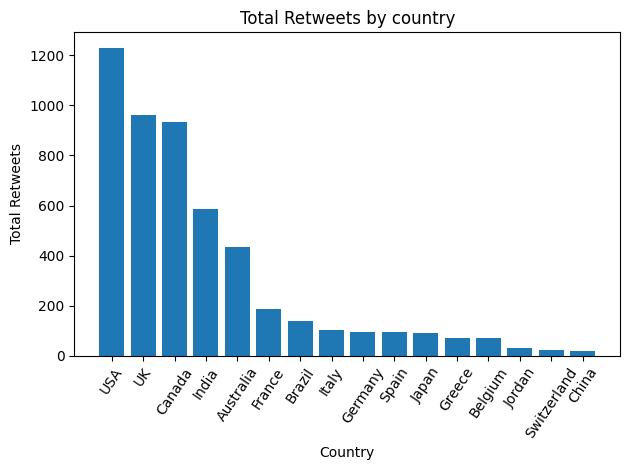

In [27]:

# Filter for Facebook platform
Twitter_df = df[df['Platform'] == 'Twitter']

#Group by 'Country' and sum 'Likes'
total_retweets_by_country = Twitter_df.groupby('Country')['Retweets'].sum().reset_index()


# Sort the results in ascending order
total_retweets_by_country = total_retweets_by_country.sort_values(by='Retweets', ascending=False)


# Print the results
#print(total_retweets_by_country)

#plot them on bar chart
plt.bar(total_retweets_by_country['Country'],total_retweets_by_country['Retweets'])
plt.xlabel('Country')
plt.ylabel('Total Retweets')
plt.title('Total Retweets by country')
plt.xticks(rotation = 56)
plt.tight_layout()

#display
plt.show()



HASHTAG & plot them on Bar Chart

In [29]:

from collections import Counter

#Split hashtags and explode into separate rows

hashtags_series = df['Hashtags'].str.split().explode()

#Count the occurrences of each hashtag

hashtag_count = Counter(hashtags_series)
#print(hashtag_count)

#Convert to DataFrame for easier handling
hashtag_df = pd.DataFrame(hashtag_count.items(),columns=['Hashtag','Count'])
hashtag_df = hashtag_df.sort_values(by='Count', ascending=False)



# Display the top hashtags
top_hashtags = hashtag_df.head(20)
#top_hashtags


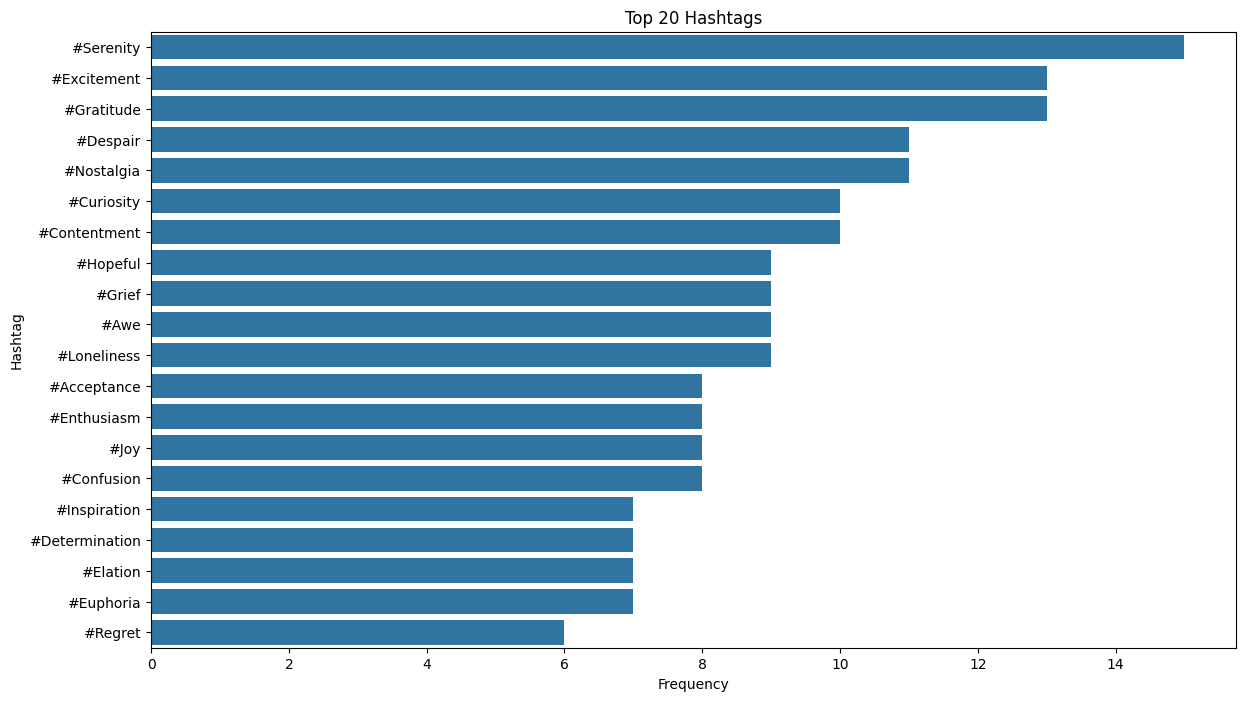

In [32]:
#Bar  chart for top hashtags

plt.figure(figsize=(14,8))
sns.barplot(x='Count', y= 'Hashtag', data=top_hashtags)
plt.title('Top 20 Hashtags')
plt.xlabel('Frequency')
plt.ylabel('Hashtag')

#display
plt.show()


Generating a world cloud if it's good.

In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(hashtag_count)

# Display the word cloud
plt.figure(figsize=(19, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
#plt.title('Word Cloud of Hashtags')
#plt.show()


NameError: name 'hashtag_count' is not defined